**GRIP MAY21
The Sparks Foundation

Author: Spandan Pajgade

Task 1-Prediction using Supervised ML
Task Obejctive- Predict the perce|ntage of an student based on the no. of study hours and predict the score if a student studies for 9.25 hrs/ day

Step-1 Reading the Dataset

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"  # Reading data from remote link
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step-2 Checking for missing values and basic statistical details of data¶

In [3]:
data.isnull().sum()  #checking for missing values

Hours     0
Scores    0
dtype: int64

In [4]:
data.describe()   #statisticals details of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Step-3 Plotting data on 2D graph to find relation between features

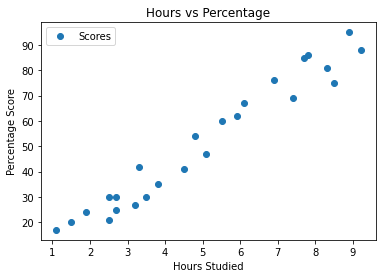

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Conclusion from the above graph, we can clearly see that as number of study hours increases, the percentage score is also increasing, so there is a positive linear relation between the number of hours studied and percentage of score.

**Step-4 Preparing the Data

In [13]:
#divide the data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [14]:
#Now splitting this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

**Step-5 Training the data

In [15]:
#training the model using linear regression 
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) #first training the model using train data

LinearRegression()

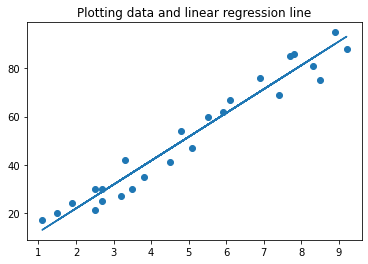

In [16]:
line = model.coef_*X+model.intercept_   # Plotting the regression line
plt.scatter(X, y)                       # Plotting for the test data 
plt.plot(X, line);
plt.title("Plotting data and linear regression line")
plt.show()

**Step-6 Prediction using the model

In [17]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#prediction as per question 
hours = 9.25
test = np.array([hours])
test=test.reshape(-1,1)
own_pred = model.predict(test)
print("If a student studies for 9.25 hrs/ day then predicted Score is {} ".format(own_pred[0]))

If a student studies for 9.25 hrs/ day then predicted Score is 93.69173248737538 


**Step-7 Evaluating the model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
